For questions 1 to 3:

Perform a linear regression to predict Y from X1, X2, and X3. Use the file homework_1.1.csv.

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors

In [25]:
# Load hw1.1
hw1_1_df = pd.read_csv('homework_1.1.csv')
print("First few rows of homework_1.1.csv:")
print(hw1_1_df.head())

First few rows of homework_1.1.csv:
   Unnamed: 0        X1        X2        X3          Y
0           0 -0.440646 -0.390227  0.156718  -0.877671
1           1 -3.810099 -1.304665 -1.105117 -10.130388
2           2 -1.425451 -0.340049  1.115908   0.284068
3           3 -1.325750  0.161906 -0.254670  -1.994344
4           4  3.120263  1.487343 -1.164839   2.030030


In [35]:
# Create feature matrix and target vector
X = hw1_1_df[['X1', 'X2', 'X3']]
y = hw1_1_df['Y']

In [36]:
# Question 1: Coefficient of X1 in multiple regression
model = LinearRegression()
model.fit(X, y)
X1_coef = model.coef_[0]
print(f"\nQuestion 1: Coefficient of X1 in multiple regression = {X1_coef:.4f}")
print(f"All coefficients: X1={model.coef_[0]:.4f}, X2={model.coef_[1]:.4f}, X3={model.coef_[2]:.4f}")


Question 1: Coefficient of X1 in multiple regression = 1.0071
All coefficients: X1=1.0071, X2=1.9646, X3=2.9755


In [28]:
# Question 2: Most significant coefficient
n = len(hw1_1_df)
# number of predictors
p = 3  
y_pred = model.predict(X)
residuals = y - y_pred
mse = np.sum(residuals**2) / (n - p - 1)

X_with_ones = np.column_stack([np.ones(n), X])
cov_matrix = np.linalg.inv(X_with_ones.T @ X_with_ones) * mse
# Skip intercept
std_errors = np.sqrt(np.diag(cov_matrix)[1:])  
t_values = np.abs(model.coef_ / std_errors)
print("\nT-statistics for significance:")
print(f"X1 t-value: {t_values[0]:.4f}")
print(f"X2 t-value: {t_values[1]:.4f}")
print(f"X3 t-value: {t_values[2]:.4f}")

most_sig_idx = np.argmax(t_values)
most_sig_var = ['X1', 'X2', 'X3'][most_sig_idx]
print(f"Question 2: Most significant coefficient = {most_sig_var} with t-value = {t_values[most_sig_idx]:.4f}")


T-statistics for significance:
X1 t-value: 60.9840
X2 t-value: 53.2832
X3 t-value: 196.6452
Question 2: Most significant coefficient = X3 with t-value = 196.6452


In [29]:
# Question 3: Difference between individual and multiple regression coefficients
print("\nQuestion 3: Comparing individual vs. multiple regression coefficients")
individual_coefs = {}
for i, col in enumerate(['X1', 'X2', 'X3']):
    X_single = hw1_1_df[[col]]
    model_single = LinearRegression()
    model_single.fit(X_single, y)
    individual_coefs[col] = model_single.coef_[0]
    print(f"{col}: individual coefficient = {model_single.coef_[0]:.4f}")

print("\nMultiple regression coefficients:")
for i, col in enumerate(['X1', 'X2', 'X3']):
    print(f"{col}: multiple coefficient = {model.coef_[i]:.4f}")

print("\nAbsolute differences between individual and multiple regression:")
differences = {}
for i, col in enumerate(['X1', 'X2', 'X3']):
    differences[col] = abs(individual_coefs[col] - model.coef_[i])
    print(f"{col}: difference = {differences[col]:.4f}")

max_diff_feature = max(differences, key=differences.get)
print(f"Feature with greatest difference: {max_diff_feature} with difference = {differences[max_diff_feature]:.4f}")


Question 3: Comparing individual vs. multiple regression coefficients
X1: individual coefficient = 1.8418
X2: individual coefficient = 4.0836
X3: individual coefficient = 3.0970

Multiple regression coefficients:
X1: multiple coefficient = 1.0071
X2: multiple coefficient = 1.9646
X3: multiple coefficient = 2.9755

Absolute differences between individual and multiple regression:
X1: difference = 0.8346
X2: difference = 2.1190
X3: difference = 0.1216
Feature with greatest difference: X2 with difference = 2.1190


In [30]:
hw1_2_df = pd.read_csv('homework_1.2.csv')
print("First few rows of homework_1.2.csv:")
print(hw1_2_df.head())

First few rows of homework_1.2.csv:
   Unnamed: 0  X         Y         Z
0           0  0  0.548814  0.548814
1           1  1  1.215189  0.715189
2           2  0  0.602763  0.602763
3           3  0  0.544883  0.544883
4           4  0  0.423655  0.423655


In [31]:
# Split the data into X=0 and X=1 groups
X_0 = hw1_2_df[hw1_2_df['X'] == 0]
X_1 = hw1_2_df[hw1_2_df['X'] == 1]
print(f"\nNumber of samples with X=0: {len(X_0)}")
print(f"Number of samples with X=1: {len(X_1)}")

# Approach A: Find the best match in X=0 for each X=1
print("\nBest match for each X=1")
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(X_0[['Z']].values)

# Find nearest neighbor for each X=1 sample
distances, indices = nn_model.kneighbors(X_1[['Z']].values)

# Question 4: Distance of the farthest match
farthest_match_distance = distances.max()
print(f"Question 4: Distance of the farthest match = {farthest_match_distance:.6f}")


Number of samples with X=0: 52
Number of samples with X=1: 48

Best match for each X=1
Question 4: Distance of the farthest match = 0.210217


In [32]:
# Get the matched X=0 samples
matched_X_0 = X_0.iloc[indices.flatten()]
# Question 5: Calculate the effect
effect = X_1['Y'].mean() - matched_X_0['Y'].mean()
print(f"Question 5: Effect (difference in Y means) = {effect:.4f}")
print(f"  Mean Y for X=1: {X_1['Y'].mean():.4f}")
print(f"  Mean Y for matched X=0: {matched_X_0['Y'].mean():.4f}")

Question 5: Effect (difference in Y means) = 0.5434
  Mean Y for X=1: 1.1256
  Mean Y for matched X=0: 0.5822


In [33]:
print("\nAll matches within radius 0.2")
radius = 0.2
radius_model = NearestNeighbors(radius=radius)
radius_model.fit(X_0[['Z']].values)
# Find all neighbors within the radius for each X=1 sample
distances_radius, indices_radius = radius_model.radius_neighbors(X_1[['Z']].values)

# Question 6: Count duplicates
all_indices = np.concatenate(indices_radius)
unique_indices, counts = np.unique(all_indices, return_counts=True)
# Display counts information
print(f"Total matches found: {len(all_indices)}")
print(f"Unique X=0 samples matched: {len(unique_indices)}")
duplicates = sum(counts - 1)  # Sum of (count - 1) for each unique index
print(f"Question 6: Number of duplicates = {duplicates}")


All matches within radius 0.2
Total matches found: 737
Unique X=0 samples matched: 52
Question 6: Number of duplicates = 685


In [34]:
# Question 7: Calculate the effect with radius neighbors
# For each X=1 sample, get the mean Y of its neighbors
neighbor_means = []
for i, idx_array in enumerate(indices_radius):
    if len(idx_array) > 0:  # Only if there are neighbors
        neighbor_y_values = X_0.iloc[idx_array]['Y'].values
        neighbor_means.append(np.mean(neighbor_y_values))

# Calculate the effect
effect_radius = X_1['Y'].mean() - np.mean(neighbor_means)
print(f"Question 7: Effect with radius neighbors = {effect_radius:.4f}")
print(f"  Mean Y for X=1: {X_1['Y'].mean():.4f}")
print(f"  Mean Y for radius-matched X=0: {np.mean(neighbor_means):.4f}")

Question 7: Effect with radius neighbors = 0.5844
  Mean Y for X=1: 1.1256
  Mean Y for radius-matched X=0: 0.5412


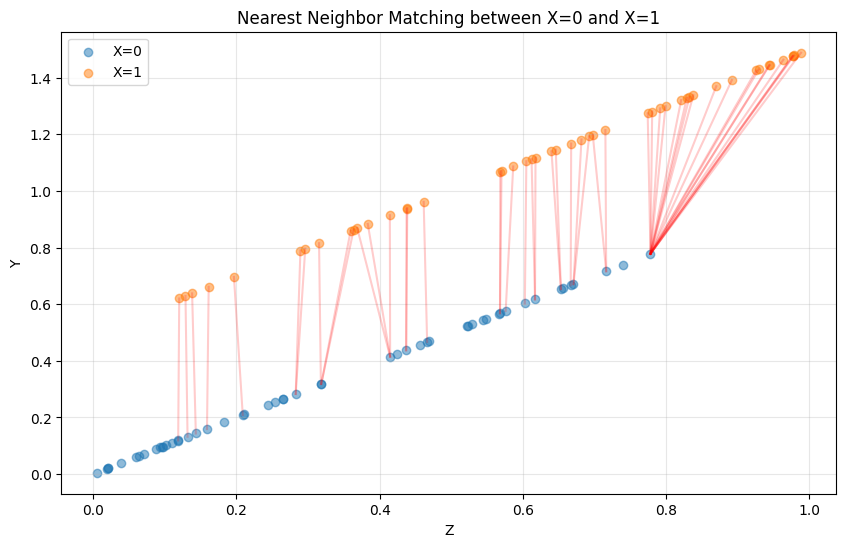

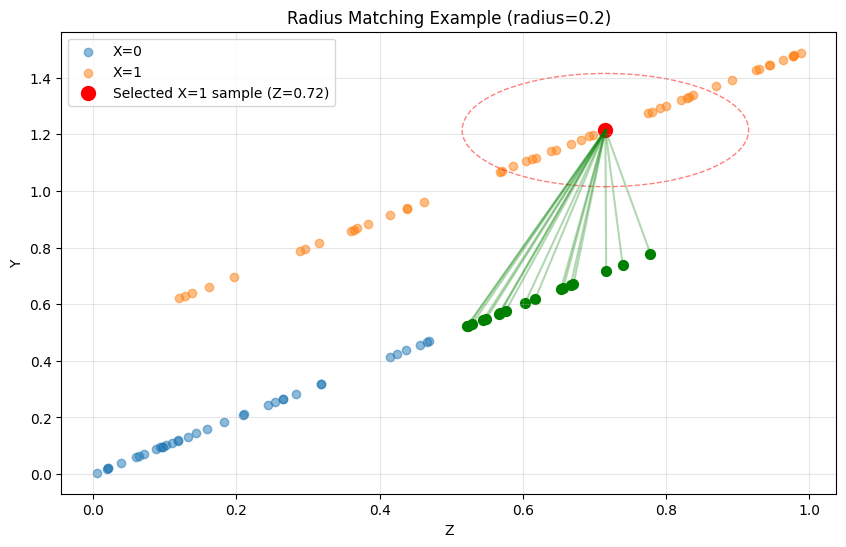

In [22]:
# Visualization of nearest neighbor matching
plt.figure(figsize=(10, 6))
plt.scatter(X_0['Z'], X_0['Y'], alpha=0.5, label='X=0')
plt.scatter(X_1['Z'], X_1['Y'], alpha=0.5, label='X=1')

# Highlight the matched pairs
for i, idx in enumerate(indices.flatten()):
    plt.plot([X_1.iloc[i]['Z'], X_0.iloc[idx]['Z']], 
             [X_1.iloc[i]['Y'], X_0.iloc[idx]['Y']], 'r-', alpha=0.2)

plt.title('Nearest Neighbor Matching between X=0 and X=1')
plt.xlabel('Z')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualization of radius matching (for one sample)
sample_idx = 0  # Choose first sample for illustration
plt.figure(figsize=(10, 6))
plt.scatter(X_0['Z'], X_0['Y'], alpha=0.5, label='X=0')
plt.scatter(X_1['Z'], X_1['Y'], alpha=0.5, label='X=1')

# Highlight the sample and its radius matches
sample_Z = X_1.iloc[sample_idx]['Z']
sample_Y = X_1.iloc[sample_idx]['Y']
plt.scatter([sample_Z], [sample_Y], color='red', s=100, 
            label=f'Selected X=1 sample (Z={sample_Z:.2f})')

# Draw a circle with radius 0.2 around the sample
circle = plt.Circle((sample_Z, sample_Y), 0.2, color='r', 
                    fill=False, linestyle='--', alpha=0.5)
ax = plt.gca()
ax.add_patch(circle)

# Highlight the matched neighbors
for idx in indices_radius[sample_idx]:
    plt.scatter([X_0.iloc[idx]['Z']], [X_0.iloc[idx]['Y']], 
                color='green', s=50)
    plt.plot([sample_Z, X_0.iloc[idx]['Z']], 
             [sample_Y, X_0.iloc[idx]['Y']], 'g-', alpha=0.3)

plt.title('Radius Matching Example (radius=0.2)')
plt.xlabel('Z')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()